# Check flux density

this script is made to:
1. draw the probe location
2. convert from 'color' value to 'flux density' value using a colormap metric

Notice, the image used here is for paper illustration, so its resolution is higher than the imgages in dataset. Therefore the probe location (pixel index) used here is different from the one in dataset.

In [34]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
path = ''
item = "plt_.png"
img = Image.open(os.path.join(path,item))

In [38]:
img.size

(686, 566)

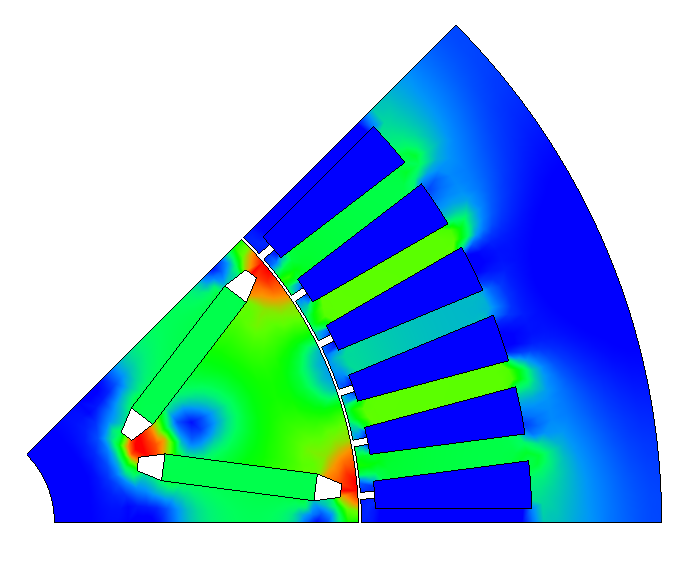

In [2]:
img

In [3]:
pix = np.array(img)

In [40]:
pix.shape

(566, 686, 4)

## Step 1: draw probe location

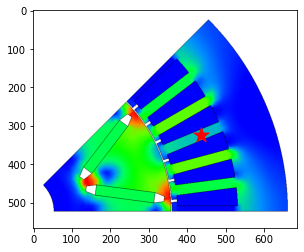

In [46]:
plt.figure()
plt.imshow(pix)
x = 435
y = 325
plt.scatter(x, y, s=250, c='red', marker='*')
plt.savefig('plt.png')
plt.show()

## Step 2: use colormap legend to map from color to flux density

In [47]:
# get the pixel value at probe loc.
probe=pix[y][x]
probe

array([  0, 188, 194, 255], dtype=uint8)

In [52]:
# open the colormap
item2 = "colormap.png"
img2 = Image.open(item2)
pix2 = np.array(img2)   # convert to nump array
pix2.shape

(297, 33, 4)

In [53]:
pix2

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

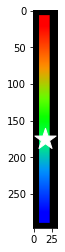

In [60]:
# drop last col, because its value == 255 and have no use
pix3=pix2[:,:,0:3]
plt.figure()
plt.imshow(pix3)
# plot a star on the colormap
width=15; height=175;
plt.scatter(width, height, s=500, c='white', marker='*')
plt.show()

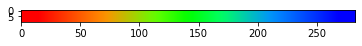

In [89]:
# chop the top and bottom margin to make a precise scale
pix4=pix3[7:-7,10:20,:]
# show the scale with 90deg rotated view
img=np.transpose(pix4, (1, 0, 2))
plt.imshow(img)

In [97]:
# drop last col, because its value == 255 and have no use
probe=probe[0:3].astype('int16')
# change the dtype to 'int16' 
ColorInd = pix4[:,5,:].astype('int16') 
ColorInd.shape

(283, 3)

Find the position of the probe on the scale based on its color value:
1. find the difference between every position of the scale and the probe value 
2. get the norm of the 3 color channel vector of the difference at every position 
3. find the position of the least norm value 

In [99]:
diff = ColorInd-probe
diff_norm = np.linalg.norm(diff,axis=1)
ind=np.where(diff_norm==np.min(diff_norm))

In [101]:
# the scale's range is [0, 2.2]
length=ColorInd[:,0].shape[0]
((1 - ind[0]/length)*2.2)[0]

0.6840989399293287

# loop all test images
this part is made to do patch conversion and save result, .py file has made to replace this part

In [29]:
def initial_Bar():
    item2 = "colormap.png"
    img2 = Image.open(item2) 
    pix2 = np.array(img2)
    # 最后一列全是255，没有用处
    pix3=pix2[:,:,0:3]
    return pix3[7:-7,15,:].astype('int16') 

def get_B(probe, ColorInd):
    probe=probe[0:3].astype('int16')
    diff = ColorInd-probe
    diff_norm = np.linalg.norm(diff,axis=1)
    ind=np.where(diff_norm==np.min(diff_norm))
    length=ColorInd[:,0].shape[0]
    return ((1-ind[0]/length)*2.2)[0]

In [30]:
ColorInd=initial_Bar()
x = 165
y = 145
path = 'dataset\\FEA_p1_2004\\test\\b'

In [31]:
dirs = os.listdir(path)
B_sum=[]
for item in dirs:
    img = Image.open(os.path.join(path,item))
    pix = np.array(img)
    probe=pix[y][x]
    B = get_B(probe, ColorInd)
    B_sum.append([item, B])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset\\FEA_p1_2004\\test\\b'

In [88]:
import pandas as pd
result_list = pd.DataFrame(
    B_sum)
result_list.to_csv('B_sum_true.csv',index=False)